# Projeto de Inteligência Artificial - Fase 2 Processo LAIS/UFRN

A realização deste projeto se deve como parte do processo de seleção para novos bolsistas que irão integrar ao Projeto "PESQUISA APLICADA PARA INTEGRAÇÃO INTELIGENTE ORIENTADA AO FORTALECIMENTO DAS REDES DE ATENÇÃO PARA RESPOSTA RÁPIDA À SÍFILIS" do LAIS/UFRN.

## 1. Importando bibliotecas

Aqui iremos importar previamente algumas bibliotecas e funções que nos serão de grande ajuda.

_NOTA: Algumas bibliotecas serão importadas apenas posteriormente, para fazerem melhor alusão à situação._

In [1]:
# Bibliotecas necessárias para análise dos dados
import pandas as pd
import numpy as np

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré processamento
from sklearn.preprocessing import StandardScaler

# Divisão em treino e teste
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Algoritmos de machine learning ---- IMPORTADOS POSTERIORMENTE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

# Model Stacking
#from sklearn.ensemble import StackingClassifier

# Melhor parametrização ---- IMPORTADO POSTERIORMENTE
#from sklearn.model_selection import GridSearchCV

# Para checar performance do projeto
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score


import warnings
warnings.simplefilter(action="ignore")

## 2. Análise Exploratória de Dados

Nesta primeira parte queremos informações básicas sobre os tipos de dados, colunas, valores nulos, etc.
Tentamos obter informações extras a partir da plena análise do dataset disposto.

Informações como média, mínimo, máximo e quadrantes também serão obtidos nesta seção.

In [2]:
# Lendo o dataset disponível
data = pd.read_csv("datasets/fetal_health.csv")

# Tendo uma ideia sobre o dataset
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
# Aqui veremos todas as colunas do dataset e sob que tipo elas operam. Todas operam sobre floats
# Também podemos ver se existem valores nulos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
# Como visto ainda agora, não existem valores nulos no dataset.
# Porém, mesmo assim usaremos um método mais específico para tal checagem.
# Observa-se então que realmente não há valores nulos.

print(data.columns[data.isnull().any()])

# NOTA: Muitos utilizam a função isna() além da isnull(), porém em python elas são a mesma coisa.

Index([], dtype='object')


In [5]:
# Agora, teremos ideia dos valores em cada coluna através de alguns cálculos úteis.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


### Limpando o Dataset

Como primeiros passos, iremos analisar o dataset e procurarmos formas de corrigir possíveis erros.

In [6]:
# Também checamos se existem colunas que possuem apenas um valor.
# Afinal, essas colunas não influenciam em nada, pois seu valor é sempre o mesmo.

unique_columns = [col for col in data.columns if len(data[col].unique()) == 1]
print(unique_columns)

# Como não existem tais colunas, fazemos nada.
# Caso houvessem, as eliminaríamos.

# data = data.drop(unique_columns, axis=1)

[]


Felizmente, o dataset utilizado neste trabalho foi bem montado. Não existem valores nulos, nem desconsideráveis e nem sujos.

## 3. Propósito do projeto

O projeto gira em torno da classificação do feto em 3 tipos de saúde: Normal, Suspeito e Patológico. Tais classificações sendo representadas pelos valores: 1.0, 2.0 e 3.0.

Neste sentido, decidi checar se a coluna que representa tal classificação está bem fundada.

In [7]:
# Aqui, faremos inferências sobre a saúde fetal geral.
## O resultado mostra que existem realmente apenas estes 3 valores.
print(data['fetal_health'].unique())

## Descobrimos quantos fetos se adequam em cada caso.
print(data['fetal_health'].value_counts())

normal_fetus = 1655
sus_fetus = 295
pat_fetus = 176

# Sabemos que o dataset conta com 216 registros, então apenas fazemos uma checagem de segurança.
if normal_fetus + sus_fetus + pat_fetus != 2126:
    print("ERRO NA TRANSFORMAÇÃO DO DATAFRAME. INFORMAÇÕES SE PERDERAM!!")
print("Fetos saudáveis: {}\nFetos suspeitos: {}\nFetos patológicos: {}".format(normal_fetus,sus_fetus, pat_fetus))

[2. 1. 3.]
1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64
Fetos saudáveis: 1655
Fetos suspeitos: 295
Fetos patológicos: 176


## 3.1 Transformações de simplificação no Dataframe

Nesta região de códigos, faremos modificações ao dataframe atual e também criaremos alguns auxiliadores para seções posteriores. Tudo feito aqui é por decisão e julgamento do programador.

In [8]:
# Como o foco do projeto está inteiramente relacionado à classificação da saúde do feto, foi decidido
# colocar a coluna de saúde fetal como índices em um novo dataframe
df = data.set_index(['fetal_health'])
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
2.0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1.0,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
1.0,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
1.0,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
1.0,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [9]:
# Alguns dataframes auxiliares para nos ajudar no processo
df_normal = df.loc[1]
df_sus = df.loc[2]
df_pat = df.loc[3]

In [10]:
# Com a redução de muitos valores nas colunas desses dataframes auxiliares em relação ao original,
# checamos novamente se existem colunas com apenas um valor.

unique_normal = [col for col in df_normal.columns if len(df_normal[col].unique()) == 1]
print(unique_normal)

unique_sus = [col for col in df_sus.columns if len(df_sus[col].unique()) == 1]
print(unique_sus)

unique_pat = [col for col in df_pat.columns if len(df_pat[col].unique()) == 1]
print(unique_pat)

[]
['severe_decelerations']
[]


Com isso, descobrimos uma informação que possivelmente mostresse útil.

In [11]:
# Observando que a coluna 'severe_decelerations' foi revelado, tentamos fazer mais inferências sobre ela.
print(data['severe_decelerations'].unique())

# Possuindo apenas valores 0 ou 0.001, sabemos que a soma de seus valores representa
# quantos valores diferentes de 0 temos

# print(df_normal['severe_decelerations'].sum())
print("Sobre a coluna \'severe_decelerations\':")
print("\tEm classificações normais existe, apenas {} valor diferente de 0.".format(int(df_normal['severe_decelerations'].sum()*1000)))
print("\tEm classificações patológicas existem, apenas {} valores diferentes de 0.".format(int(df_pat['severe_decelerations'].sum()*1000)))


[0.    0.001]
Sobre a coluna 'severe_decelerations':
	Em classificações normais existe, apenas 1 valor diferente de 0.
	Em classificações patológicas existem, apenas 6 valores diferentes de 0.


Percebe-se agora que possuir valor diferente de 0 no atributo *severe_decelerations*, é um forte indicativo para o feto estar na classificação patológica.

## 4. Visualização da coluna alvo

Utilizando bibliotecas de visualização em gráficos, faremos algumas projeções que nos ajudam a decidir os próximos caminhos de ação.

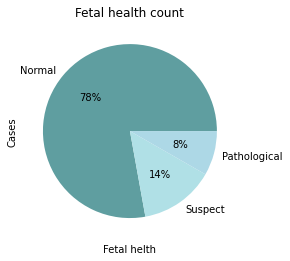

In [12]:
pie_fetal_health = plt.pie([normal_fetus, sus_fetus, pat_fetus], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")

plt.show()

### 4.1 Vetor de correlação com coluna alvo

Um passo que pode nos retornar diversas informações pertinentes, é a checagem de correlação entre colunas. À depender do resultado, poderemos obter por ignorar alguma coluna ou focar nossos esforços em algumas específicas.

Nos próximos passos realizaremos isto.

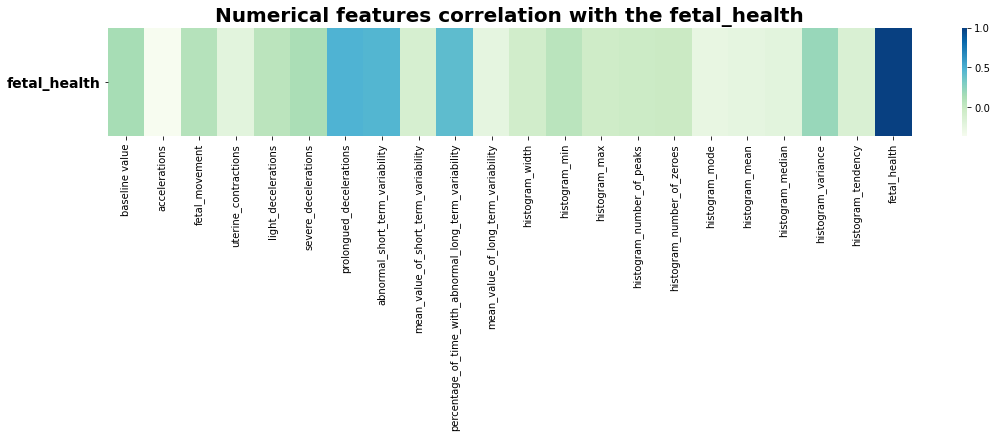

In [13]:
# Graças ao data.info() no início, sabemos que todos os valores no dataset são floats,
# logo não temos tipos "object".

f,ax = plt.subplots(figsize=(18,2))
sns.heatmap(data.corr().sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=20)
plt.yticks(weight="bold", rotation=0, fontsize=14)

plt.show()

Podemos observar agora a existência de uma correlação mais detacável nas seguintes colunas: *prolongued_decelerations*, *abnormal_short_term_variability* e *percentage_of_time_with_abnormal_long_term_variability*.

Porém, graças ao mapa de calor da correlação, é identificável que tais correlações não possuem alto valor.

Sendo assim, descobriremos seus valores numéricos.

In [14]:
numeric_corr = data.corr()["fetal_health"].sort_values(ascending=False).head(22).to_frame()

numeric_corr.style.background_gradient()

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


## 5. Processamento dos dados

### 5.1 Redimensionando os dados

A etapa de redimensionamento é de grande importância para qualquer algoritmo de *machine learning*. O objetivo é mudar os valores de colunas numéricas no dataset para uma escala em comum, sem distorcer ou perder informação preciosas.

E porque fazer isso? Para evitar problemas ao tentar combinar ou aplicar algoritmos em cima valores que pertençam em escalas muitos diferentes durante a modelagem, como um eixo de informações pertencer ao range [0,1] ao passo que outro pertence ao range [10000, 100000].

As técnicas mais comuns são de normalização e de padronização dos dados. Àbaixo, apartir da biblioteca sklearn, usaremos a padronização.

In [15]:
# Como a coluna "fetal_health" é o resultado de classificação que buscamos, claramente ela não será redimensionada.
X = pd.DataFrame(StandardScaler().fit_transform(data.drop(["fetal_health"],axis = 1),), columns = list(data.columns)[:-1])

In [16]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


### 5.2 Divisão entre teste e treino

Nossa pré-etapa antes de aplicarmos os modelos de machine-learning. Os valores que aqui escolhemos vão influenciar por todo o restante do projeto.

In [17]:
# Definimos quem é nossa coluna contendo os resultados desejáveis
y = data["fetal_health"]

# E realizamos a divisão entre conjuntos de valores usados para treinamento e aqueles para teste.
# Nesse caso, teremos um conjunto de treinamento de 75% do tamanho de data.

# Ademais, por tratar-se de um sistema de classificação, é normalmente recomendável habilitar o stratify,
# pois este parâmetro faz com que haja uma boa proporção das 3 classificações de Normal, Suspeito ou Patológico
# em ambos conjuntos de treino e teste.

# Para efeitos de curiosidade, recomendasse rodar esta célula várias vezes sem o parâmetro stratify ativo.
# Será bem perceptível a alteração nos outputs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train.value_counts(), y_test.value_counts()

(1594, 21) (532, 21) (1594,) (532,)


(1.0    1241
 2.0     221
 3.0     132
 Name: fetal_health, dtype: int64,
 1.0    414
 2.0     74
 3.0     44
 Name: fetal_health, dtype: int64)

## 6 Algoritmos de Machine Learning

Chegando agora na parte principal do projeto, onde a mágica do machine learning realmente acontece.

Iremos escolher o(s) algoritmo(s) de machine learning a serem utilizados, baseando-nos nas análises feitas desde a primeira linha de código deste projeto. Após estas decisões, iremos aplicar os algoritmos e checarmos seus resultados.

### 6.1 Escolha dos Algoritmos

Antes de tudo, uma breve explicação dos algoritmos escolhidos e do contato do programador com os mesmos.

Possuo experiência com o modelo básico de pseudo aprendizado inteligente, **K Nearest Neighboors(KNN)**,
e graças à fama dessess modelos, também adquiri experiência e treinamento com
**Gradient Boosting** e **Random Forest**. Excelentes algoritmos de classificação que por estarem
em constante supervisão e consistirem de aglomerados de algoritmos, costumam ter treinos mais lentos
porém resultados de predição bem melhores.

Ademais, como descoberto durante a realização deste projeto, o modelo **XGBoost** também merece atenção pois
deriva do modelo **Gradient Boosting** e ultimamente tem sido campeão em resultados nas competições do Kaggle.

Por tratar-se de um modelo simplista demais para este projeto, o **KNN** foi descartado logo de cara.
E pela noção de que **XGBoost** é melhor e similar ao **Gradient Boosting**, o último também foi descartado.

Portanto, para tentarmos achar o melhor resultado, aplicaremos os modelos **XGBoost** e **Random Forest**.


In [18]:
# Algoritmos de machine learning
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### 6.2 Tunando os parâmetros

Como modelos de machine learning possuem muitos parâmetros, costuma ser útil procurarmos valores para os parâmetros que retornem os melhores resultados. Isso é o que chamamos de *tuneling parameters*, ou de tunar os parâmetros.

Para nos ajudar nesta tarefa, utilizamos a função importada *GridSearchCV*. Com ela, poderemos dar opções de valores para os parâmetros e obtermos a melhor combinação de tais parâmetros. Como trata-se realmente de uma testagem sob toda combinação, é recomendável utilizarmos apenas os parâmetros mais essenciais, tarefa esta sendo dever do programador.

In [83]:
# Melhor parametrização
from sklearn.model_selection import GridSearchCV

### 6.2 Modelo Random Forest

Realizações dos algoritmos e seus resultados. Acurácia, f1_score e matriz de confusão abordadas.

In [37]:
# Resultado padrão do Random Forest sem uso de parâmetros.
# Utiliza-se os parâmetros padrões, os quais podem não ser os melhores para nosso objetivo.

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# A pontuação obtida pelos acertos do algoritmo.
print(round(random_forest.score(X_test, y_test), 3))

0.94


Na célula exatamente abaixo definimos nosso método de validação cruzada. Assim, poderemos validar a eficácia do modelo sem nos prender à determinadas escolhas de conjunto testes e treinos, pois a validação irá randomizar isto para nós em uma determinada quantia de iterações.

Exemplo visual para 5 iterações:

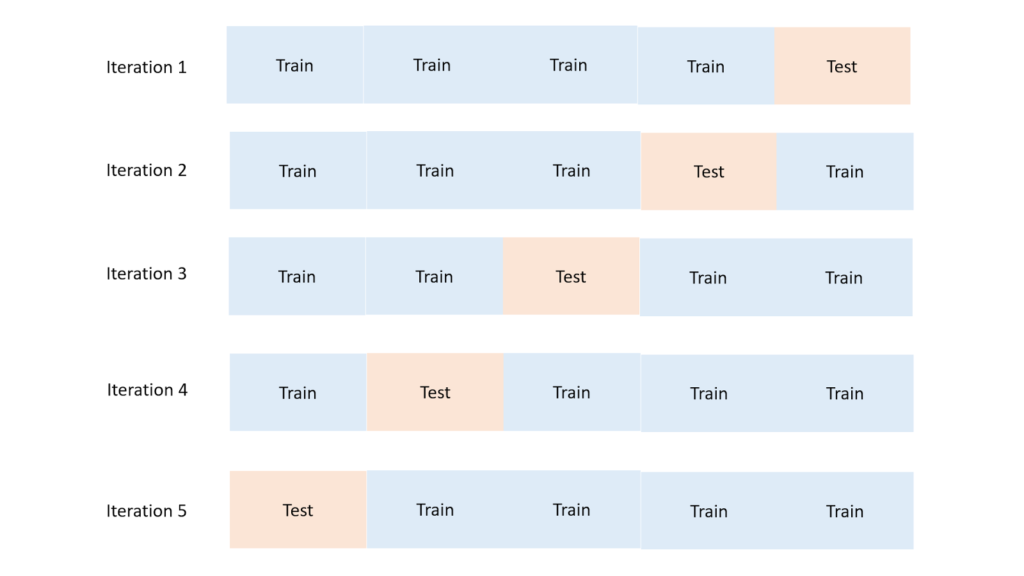

In [50]:
# Definimos nosso método de validação cruzada.
# NOTA: o valor padrão de n_splits já é 5.
# NOTA2: após rodar várias vezes sem random_state, foi observada uma dificuldade maior em replicar os resultados.
# Por isso a adição posterior de random_state

cv_method = StratifiedKFold(n_splits=5, random_state=5)

In [51]:
# Validação cruzada sob o modelo Random Forest

score_RF = cross_val_score(random_forest, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")
score_RF = np.array([round(x,3) for x in score_RF])

print("Resultados da validação cruzada para o modelo RF:")
print("\tPontuação da validação:", score_RF)
print("\tMédia:", round(score_RF.mean(), 3))
print("\tDesvio padrão:",round(score_RF.std(), 3))

Resultados da validação cruzada para Random Forest:
	Pontuação da validação: [0.947 0.931 0.934 0.95  0.937]
	Média: 0.94
	Desvio padrão: 0.007


In [52]:
# Definimos os possíveis parâmetros modificáveis.
params_RF = { "min_samples_split": [2, 10, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],          
              }

In [61]:
# Realizamos a descoberta dos melhores parâmetros para RF.

GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(),
                                param_grid=params_RF, 
                                cv=cv_method, verbose=1, 
                                n_jobs=3, scoring="accuracy", 
                                return_train_score=True
                                )

# E a aplicamos.
GridSearchCV_RF.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    7.4s
[Parallel(n_jobs=3)]: Done 180 out of 180 | elapsed:   28.1s finished


In [58]:
print(f"Melhores parâmetros para RF:\n{GridSearchCV_RF.best_params_}")

Melhores parâmetros para RF:
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


In [ ]:
print(f"Melhor pontuação para RF: {round(GridSearchCV_RF.best_score_, 3)}")

In [67]:
# A função importada depois de utilizada nos providencia o construtor do modelo com seus
# melhores parâmetros já aplicados. Caso ele não chame o melhor parâmetro explicitamente,
# é porque ele é valor padrão.

best_RF = GridSearchCV_RF.best_estimator_
print(best_RF)
print(type(best_RF))
print(type(RandomForestClassifier()))

RandomForestClassifier(n_estimators=400)
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [72]:
# Baseandos-nos na resposta obtida, aplicamos os melhores parâmetros encontrados.
random_forest = best_RF # construtor com parâmetros aplicados
random_forest.fit(X_train, y_train)
round(random_forest.score(X_test, y_test), 3)

0.94

In [73]:
predict_RF = random_forest.predict(X_test)
print("Resultado da Classificação")
print(classification_report(y_test, predict_RF))

Resultado da Classificação
              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96       414
         2.0       0.91      0.68      0.78        74
         3.0       0.95      0.95      0.95        44

    accuracy                           0.94       532
   macro avg       0.94      0.87      0.90       532
weighted avg       0.94      0.94      0.94       532



In [74]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, predict_RF))

Matriz de Confusão:
[[408   4   2]
 [ 24  50   0]
 [  1   1  42]]


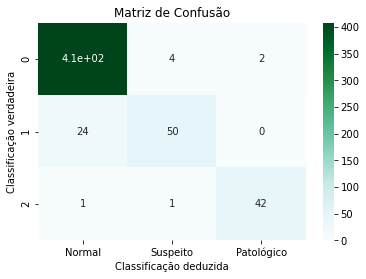

In [75]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict_RF), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Classificação deduzida");
ax.set_ylabel("Classificação verdadeira"); 
ax.set_title("Matriz de Confusão"); 
ax.xaxis.set_ticklabels(["Normal", "Suspeito", "Patológico"]);

### 6.3 Modelo XGBoost

In [80]:
# Resultado padrão do XGBoost sem uso de parâmetros.
# Utiliza-se os parâmetros padrões, os quais podem não ser os melhores para nosso objetivo.

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

round(xgb.score(X_test, y_test),3)

[21:45:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.955

In [82]:
# Validação cruzada sob o modelo XGBoost

score_XGB = cross_val_score(xgb, X_train, y_train, cv = cv_method, n_jobs = 3, scoring = "accuracy")
score_XGB = np.array([round(x,3) for x in score_XGB])

print("Resultados da validação cruzada para o modelo XGBoost:")
print("\tPontuação da validação:", score_XGB)
print("\tMédia:", round(score_XGB.mean(), 3))
print("\tDesvio padrão:",round(score_XGB.std(), 3))

Resultados da validação cruzada para o modelo XGBoost:
	Pontuação da validação: [0.944 0.944 0.94  0.947 0.969]
	Média: 0.949
	Desvio padrão: 0.01


In [ ]:
# Definimos os possíveis parâmetros modificáveis.
# Baseando-se na documentação do modelo, muitos parâmetros possuem seus melhores valores como padrão
# e outros ainda são descobertos pelo próprio algoritmo, como, por exemplo, o parâmetro "tree_method".
params_XGB = {"eta": [0.3, 0.5],
              "num_parallel_tree": [1, 2, 4, 6],
              "max_depth": [3, 6, 9, 12]
              }

In [ ]:
# Realizamos a descoberta dos melhores parâmetros para XGB.

GridSearchCV_XGB = GridSearchCV(estimator=XGBClassifier(),
                                param_grid=params_XGB, 
                                cv=cv_method, verbose=1, 
                                n_jobs=3, scoring="accuracy", 
                                return_train_score=True
                                )

# E a aplicamos.
GridSearchCV_XGB.fit(X_train, y_train);

In [ ]:
print(f"Melhores parâmetros para RF:\n{GridSearchCV_XGB.best_params_}")

In [ ]:
print(f"Melhor pontuação para RF: {round(GridSearchCV_XGB.best_score_, 3)}")

In [ ]:
# A função importada depois de utilizada nos providencia o construtor do modelo com seus
# melhores parâmetros já aplicados. Caso ele não chame o melhor parâmetro explicitamente,
# é porque ele é valor padrão.

best_XGB = GridSearchCV_XGB.best_estimator_
print(best_XGB)
print(type(best_XGB))
print(type(XGBClassifier()))

In [ ]:
# Baseandos-nos na resposta obtida, aplicamos os melhores parâmetros encontrados.
xgb = best_XGB # construtor com parâmetros aplicados
xgb.fit(X_train, y_train)
round(xgb.score(X_test, y_test), 3)

In [ ]:
predict_XGB = xgb.predict(X_test)
print("Resultado da Classificação")
print(classification_report(y_test, predict_XGB))

In [ ]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, predict_XGB))

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict_XGB), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Classificação deduzida");
ax.set_ylabel("Classificação verdadeira"); 
ax.set_title("Matriz de Confusão"); 
ax.xaxis.set_ticklabels(["Normal", "Suspeito", "Patológico"]);